# Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

### Inspect the data
1. Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

files = glob.glob('states*.csv')
states_data = []
for file in files:
  data = pd.read_csv(file)
  states_data.append(data)

us_census = pd.concat(states_data)

2. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

In [56]:
us_census = us_census.drop(['Unnamed: 0'], axis=1)
print(us_census.head())

      State  TotalPop Hispanic   White   Black Native   Asian Pacific  \
0   Georgia  10006693    8.42%  54.29%  32.09%  0.19%   3.10%   0.05%   
1    Hawaii   1406299    9.19%  25.03%   2.05%  0.14%  36.59%   8.76%   
2     Idaho   1616547   11.51%  83.14%   0.57%  1.47%   1.14%   0.13%   
3  Illinois  12873761   15.60%  60.86%  17.11%  0.12%   4.48%   0.02%   
4   Indiana   6568645    6.54%  78.43%  11.19%  0.19%   1.58%   0.03%   

       Income          GenderPop  
0  $50,811.08  4883331M_5123362F  
1  $73,264.43    709871M_696428F  
2  $48,017.32    810464M_806083F  
3  $59,587.05  6316899M_6556862F  
4  $48,616.23  3235263M_3333382F  


In [57]:
print(us_census.columns)
print(us_census.dtypes)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


### Regex to the Rescue

1. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [58]:
us_census.Income = us_census.Income.replace('[\$]', '', regex=True)
print(us_census.Income.head())

0    50,811.08
1    73,264.43
2    48,017.32
3    59,587.05
4    48,616.23
Name: Income, dtype: object


2. Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

There is still an M or an F character in each entry! We should remove those before we convert.

In [59]:
gender_split = us_census.GenderPop.str.split('_')
us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)
us_census['Men'] = us_census.Men.replace('M', '', regex=True)
us_census['Women'] = us_census.Women.replace('F', '', regex=True)

print(us_census.head())

      State  TotalPop Hispanic   White   Black Native   Asian Pacific  \
0   Georgia  10006693    8.42%  54.29%  32.09%  0.19%   3.10%   0.05%   
1    Hawaii   1406299    9.19%  25.03%   2.05%  0.14%  36.59%   8.76%   
2     Idaho   1616547   11.51%  83.14%   0.57%  1.47%   1.14%   0.13%   
3  Illinois  12873761   15.60%  60.86%  17.11%  0.12%   4.48%   0.02%   
4   Indiana   6568645    6.54%  78.43%  11.19%  0.19%   1.58%   0.03%   

      Income          GenderPop      Men    Women  
0  50,811.08  4883331M_5123362F  4883331  5123362  
1  73,264.43    709871M_696428F   709871   696428  
2  48,017.32    810464M_806083F   810464   806083  
3  59,587.05  6316899M_6556862F  6316899  6556862  
4  48,616.23  3235263M_3333382F  3235263  3333382  


3. Convert both of the columns into numerical datatypes.

In [60]:
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
Men            int64
Women        float64
dtype: object


4. Use matplotlib to make a scatterplot!

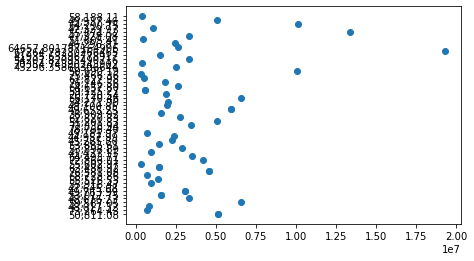

In [61]:
plt.scatter(us_census.Women, us_census.Income) 
plt.show()

5. You want to double check your work. You know from experience that these monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [62]:
us_census.Women = us_census.Women.fillna(us_census.TotalPop - us_census.Men)
print(us_census.Women)

0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
Name: Women, dtype: float64


6. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [63]:
duplicates = us_census.duplicated()
duplicates.value_counts()

False    52
True      8
dtype: int64

7. Drop those duplicates using the .drop_duplicates() function.

In [69]:
us_census = us_census.drop_duplicates()

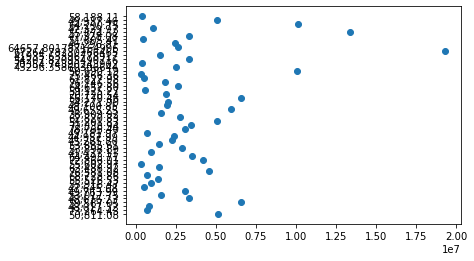

In [70]:
plt.scatter(us_census.Women, us_census.Income) 
plt.show()

### Histograms of Races

1. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [71]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

2. Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [73]:
us_census = us_census.replace(to_replace='%', value='', regex=True)
print(us_census.head())

      State  TotalPop Hispanic  White  Black Native  Asian Pacific     Income  \
0   Georgia  10006693     8.42  54.29  32.09   0.19   3.10    0.05  50,811.08   
1    Hawaii   1406299     9.19  25.03   2.05   0.14  36.59    8.76  73,264.43   
2     Idaho   1616547    11.51  83.14   0.57   1.47   1.14    0.13  48,017.32   
3  Illinois  12873761    15.60  60.86  17.11   0.12   4.48    0.02  59,587.05   
4   Indiana   6568645     6.54  78.43  11.19   0.19   1.58    0.03  48,616.23   

           GenderPop      Men      Women  
0  4883331M_5123362F  4883331  5123362.0  
1    709871M_696428F   709871   696428.0  
2    810464M_806083F   810464   806083.0  
3  6316899M_6556862F  6316899  6556862.0  
4  3235263M_3333382F  3235263  3333382.0  
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
Men            int64
Women        float64
dty

In [75]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income        object
GenderPop     object
Men            int64
Women        float64
dtype: object


In [76]:
us_census = us_census.fillna(value={'Hispanic': us_census.Hispanic.mean(), 'White': us_census.White.mean(), 'Black': us_census.Black.mean(), 'Native': us_census.Native.mean(), 
                                    'Asian': us_census.Asian.mean(), 'Pacific': us_census.Pacific.mean()})

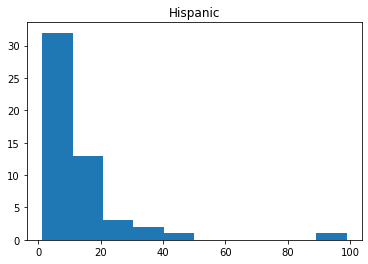

In [78]:
plt.hist(us_census.Hispanic)
plt.title('Hispanic')
plt.show()

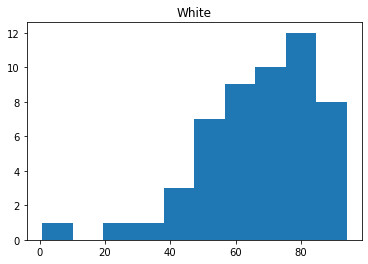

In [79]:
plt.hist(us_census.White)
plt.title('White')
plt.show()

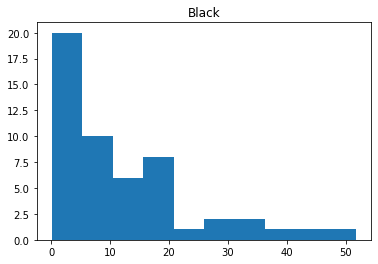

In [84]:
plt.hist(us_census.Black)
plt.title('Black')
plt.show()

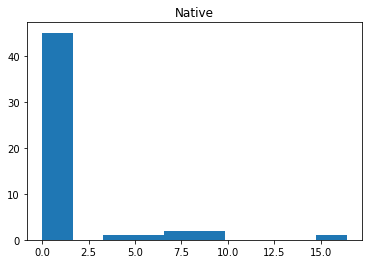

In [81]:
plt.hist(us_census.Native)
plt.title('Native')
plt.show()

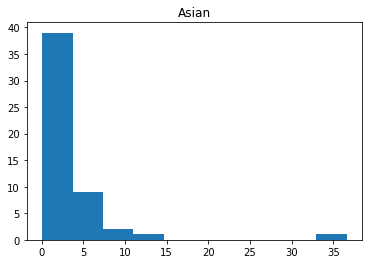

In [82]:
plt.hist(us_census.Asian)
plt.title('Asian')
plt.show()

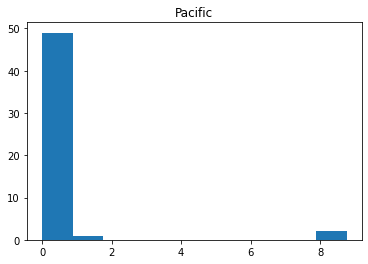

In [83]:
plt.hist(us_census.Pacific)
plt.title('Pacific')
plt.show()